#Initialization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Info

In [2]:
df_raw = pd.read_excel("df_raw.xlsx")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               277 non-null    object 
 1   Type               277 non-null    object 
 2   Confirmation Code  277 non-null    object 
 3   Start Date         148 non-null    object 
 4   Nights             148 non-null    float64
 5   Currency           277 non-null    object 
 6   Amount             149 non-null    float64
 7   Paid Out           128 non-null    float64
 8   Host Fee           130 non-null    float64
 9   Cleaning Fee       130 non-null    float64
 10  Earnings Year      149 non-null    float64
dtypes: float64(6), object(5)
memory usage: 23.9+ KB


### Tail

In [3]:
df_raw.head(5)

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,01/30/2023,Payout,lgz4hZGA3M,NaN,NaN,PHP,NaN,16714.07,NaN,NaN,NaN
1,01/30/2023,Reservation,x9T8qy6Kdn,01/29/2023,13.0,PHP,16714.07,NaN,516.93,500.0,2023.0
2,01/25/2023,Payout,lgz4hZGA3M,NaN,NaN,PHP,NaN,6532.95,NaN,NaN,NaN
3,01/25/2023,Reservation,XAlSvVcvQd,01/24/2023,5.0,PHP,6532.95,NaN,202.05,300.0,2023.0
4,01/22/2023,Payout,lgz4hZGA3M,NaN,NaN,PHP,NaN,3207.79,NaN,NaN,NaN


### Date

In [4]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw['Start Date'] = pd.to_datetime(df_raw['Start Date']) # for null values, they become NaT (not a time)
df_raw.head()

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,2023-01-30,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,16714.07,NaN,NaN,NaN
1,2023-01-30,Reservation,x9T8qy6Kdn,2023-01-29,13.0,PHP,16714.07,NaN,516.93,500.0,2023.0
2,2023-01-25,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,6532.95,NaN,NaN,NaN
3,2023-01-25,Reservation,XAlSvVcvQd,2023-01-24,5.0,PHP,6532.95,NaN,202.05,300.0,2023.0
4,2023-01-22,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,3207.79,NaN,NaN,NaN


### Earnings Year

In [5]:
df_raw['Earnings Year'] = pd.to_datetime(df_raw['Earnings Year'], format='%Y')
df_raw.head()

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,2023-01-30,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,16714.07,NaN,NaN,NaT
1,2023-01-30,Reservation,x9T8qy6Kdn,2023-01-29,13.0,PHP,16714.07,NaN,516.93,500.0,2023-01-01
2,2023-01-25,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,6532.95,NaN,NaN,NaT
3,2023-01-25,Reservation,XAlSvVcvQd,2023-01-24,5.0,PHP,6532.95,NaN,202.05,300.0,2023-01-01
4,2023-01-22,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,3207.79,NaN,NaN,NaT


### Type

In [6]:
# Define the custom sorting order
custom_order = ['Reservation', 'Resolution Payout', 'Misc Credit', 'Resolution Adjustment', 'Adjustment', 'Payout']

# Convert 'Type' column to categorical data type with the custom order
df_raw['Type'] = pd.Categorical(df_raw['Type'], categories=custom_order, ordered=True)

# Sort the DataFrame by 'Date' and 'Type'
df_sorted = df_raw.sort_values(by=['Date', 'Type'])


In [7]:
df_sorted.head()

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
276,2019-11-15,Reservation,sqtiWKSUCD,2019-11-14,2.0,PHP,2138.27,NaN,66.13,350.0,2019-01-01
275,2019-11-15,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,2138.27,NaN,NaN,NaT
274,2019-11-17,Reservation,vl5lrq4CNi,2019-11-16,2.0,PHP,2452.16,NaN,75.84,350.0,2019-01-01
273,2019-11-17,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,2452.16,NaN,NaN,NaT
272,2019-11-19,Reservation,Sgqqu2UyuH,2019-11-18,2.0,PHP,2667.50,NaN,82.50,350.0,2019-01-01


### Reset Index

In [8]:
df_sorted.reset_index(drop=True, inplace=True) # resets index then drops previous index, inplace sets to true to make it permanent
#df_sorted.set_index(pd.RangeIndex(start=0, stop=len(df_sorted), step=1), inplace=True) # this worked

df_sorted.head(25)

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,2019-11-15,Reservation,sqtiWKSUCD,2019-11-14,2.0,PHP,2138.27,NaN,66.13,350.0,2019-01-01
1,2019-11-15,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,2138.27,NaN,NaN,NaT
2,2019-11-17,Reservation,vl5lrq4CNi,2019-11-16,2.0,PHP,2452.16,NaN,75.84,350.0,2019-01-01
3,2019-11-17,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,2452.16,NaN,NaN,NaT
4,2019-11-19,Reservation,Sgqqu2UyuH,2019-11-18,2.0,PHP,2667.50,NaN,82.50,350.0,2019-01-01
5,2019-11-19,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,2667.50,NaN,NaN,NaT
6,2019-11-21,Reservation,6QA2tFOo20,2019-11-20,3.0,PHP,3037.65,NaN,93.95,350.0,2019-01-01
7,2019-11-21,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,3037.65,NaN,NaN,NaT
8,2019-11-24,Reservation,5B3XcOS3B7,2019-11-23,2.0,PHP,3220.40,NaN,99.60,350.0,2019-01-01
9,2019-11-24,Payout,lgz4hZGA3M,NaT,NaN,PHP,NaN,3220.40,NaN,NaN,NaT


### End Date

In [9]:
df_sorted['End Date'] = pd.to_datetime(df_sorted['Start Date']) + pd.to_timedelta(df_sorted['Nights'], unit='D')
new_column_order = ['Date', 'Type', 'Confirmation Code', 'Start Date', 'Nights', 'End Date', 'Currency', 'Amount', 'Paid Out', 'Host Fee', 'Cleaning Fee', 'Earnings Year']
df_sorted = df_sorted[new_column_order]
df_sorted.head()


,Date,Type,Confirmation Code,Start Date,Nights,End Date,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,2019-11-15,Reservation,sqtiWKSUCD,2019-11-14,2.0,2019-11-16,PHP,2138.27,NaN,66.13,350.0,2019-01-01
1,2019-11-15,Payout,lgz4hZGA3M,NaT,NaN,NaT,PHP,NaN,2138.27,NaN,NaN,NaT
2,2019-11-17,Reservation,vl5lrq4CNi,2019-11-16,2.0,2019-11-18,PHP,2452.16,NaN,75.84,350.0,2019-01-01
3,2019-11-17,Payout,lgz4hZGA3M,NaT,NaN,NaT,PHP,NaN,2452.16,NaN,NaN,NaT
4,2019-11-19,Reservation,Sgqqu2UyuH,2019-11-18,2.0,2019-11-20,PHP,2667.50,NaN,82.50,350.0,2019-01-01


# Conditions & Output

### PayOut

We removed duplicated PayOut so that the Conf Code has only one PayOut

In [10]:
df_cmpt = df_sorted.copy()

In [11]:

df_cmpt.loc[df_cmpt['Type'] == 'Reservation', 'PayOut'] = df_cmpt.groupby('Confirmation Code')['Amount'].transform(sum)
df_cmpt.loc[df_cmpt.duplicated(subset=['Confirmation Code', 'Type'], keep='first'), 'PayOut'] = np.nan
df_cmpt.loc[df_cmpt['Type'] != 'Reservation', 'PayOut'] = np.nan

# Reorder columns
new_column_order = ['Date', 'Type', 'Confirmation Code', 'Currency', 'Amount', 'Paid Out', 'PayOut', 'Start Date', 'Nights', 'End Date', 'Host Fee', 'Cleaning Fee', 'Earnings Year']
df_cmpt = df_cmpt.loc[:, new_column_order].copy() # .copy prevents SettingWithCopyWarning
df_cmpt.head()


,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,End Date,Host Fee,Cleaning Fee,Earnings Year
0,2019-11-15,Reservation,sqtiWKSUCD,PHP,2138.27,NaN,2138.27,2019-11-14,2.0,2019-11-16,66.13,350.0,2019-01-01
1,2019-11-15,Payout,lgz4hZGA3M,PHP,NaN,2138.27,NaN,NaT,NaN,NaT,NaN,NaN,NaT
2,2019-11-17,Reservation,vl5lrq4CNi,PHP,2452.16,NaN,2452.16,2019-11-16,2.0,2019-11-18,75.84,350.0,2019-01-01
3,2019-11-17,Payout,lgz4hZGA3M,PHP,NaN,2452.16,NaN,NaT,NaN,NaT,NaN,NaN,NaT
4,2019-11-19,Reservation,Sgqqu2UyuH,PHP,2667.50,NaN,2667.50,2019-11-18,2.0,2019-11-20,82.50,350.0,2019-01-01


### Tot Clean Fee

In [12]:
df_cmpt.loc[df_cmpt['Type'] == 'Reservation', 'Tot Clean Fee'] = df_cmpt.groupby('Confirmation Code')['Cleaning Fee'].transform(sum)
df_cmpt.loc[df_cmpt.duplicated(subset=['Confirmation Code', 'Type'], keep='first'), 'Tot Clean Fee'] = np.nan

df_cmpt.tail()

,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,End Date,Host Fee,Cleaning Fee,Earnings Year,Tot Clean Fee
272,2023-01-22,Payout,lgz4hZGA3M,PHP,NaN,3207.79,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN
273,2023-01-25,Reservation,XAlSvVcvQd,PHP,6532.95,NaN,6532.95,2023-01-24,5.0,2023-01-29,202.05,300.0,2023-01-01,300.0
274,2023-01-25,Payout,lgz4hZGA3M,PHP,NaN,6532.95,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN
275,2023-01-30,Reservation,x9T8qy6Kdn,PHP,16714.07,NaN,16714.07,2023-01-29,13.0,2023-02-11,516.93,500.0,2023-01-01,500.0
276,2023-01-30,Payout,lgz4hZGA3M,PHP,NaN,16714.07,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN


### Tot Host Fee

In [13]:
df_cmpt.loc[df_cmpt['Type'] == 'Reservation', 'Tot Host Fee'] = df_cmpt.groupby('Confirmation Code')['Host Fee'].transform(sum)
df_cmpt.loc[df_cmpt.duplicated(subset=['Confirmation Code', 'Type'], keep='first'), 'Tot Host Fee'] = np.nan

### Fnights

In [14]:
df_cmpt.loc[df_cmpt['Type'] == 'Reservation', 'Fnights'] = df_cmpt.groupby('Confirmation Code')['Nights'].transform('first')
# Update 'Fnights' to 0 where 'PayOut' is 0
df_cmpt.loc[df_cmpt['PayOut'] == 0, 'Fnights'] = 0


df_cmpt.loc[df_cmpt.duplicated(subset=['Confirmation Code', 'Type'], keep='first'), 'Fnights'] = np.nan

# Convert column to nullable integer data type
df_cmpt['Fnights'] = pd.to_numeric(df_cmpt['Fnights'], errors='coerce').astype('Int64') # Int64 preserves null values
df_cmpt.head()

,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,End Date,Host Fee,Cleaning Fee,Earnings Year,Tot Clean Fee,Tot Host Fee,Fnights
0,2019-11-15,Reservation,sqtiWKSUCD,PHP,2138.27,NaN,2138.27,2019-11-14,2.0,2019-11-16,66.13,350.0,2019-01-01,350.0,66.13,2
1,2019-11-15,Payout,lgz4hZGA3M,PHP,NaN,2138.27,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>
2,2019-11-17,Reservation,vl5lrq4CNi,PHP,2452.16,NaN,2452.16,2019-11-16,2.0,2019-11-18,75.84,350.0,2019-01-01,350.0,75.84,2
3,2019-11-17,Payout,lgz4hZGA3M,PHP,NaN,2452.16,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>
4,2019-11-19,Reservation,Sgqqu2UyuH,PHP,2667.50,NaN,2667.50,2019-11-18,2.0,2019-11-20,82.50,350.0,2019-01-01,350.0,82.50,2


### Per Night Rate

In [15]:
sum_clean_fee = df_cmpt.groupby('Confirmation Code')['Cleaning Fee'].transform(sum)

df_cmpt['Per Night Rate'] = round((df_cmpt.groupby('Confirmation Code')['PayOut'].transform('first')  - sum_clean_fee) / df_cmpt['Fnights'], 2)
df_cmpt.head()


,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,End Date,Host Fee,Cleaning Fee,Earnings Year,Tot Clean Fee,Tot Host Fee,Fnights,Per Night Rate
0,2019-11-15,Reservation,sqtiWKSUCD,PHP,2138.27,NaN,2138.27,2019-11-14,2.0,2019-11-16,66.13,350.0,2019-01-01,350.0,66.13,2,894.14
1,2019-11-15,Payout,lgz4hZGA3M,PHP,NaN,2138.27,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>,<NA>
2,2019-11-17,Reservation,vl5lrq4CNi,PHP,2452.16,NaN,2452.16,2019-11-16,2.0,2019-11-18,75.84,350.0,2019-01-01,350.0,75.84,2,1051.08
3,2019-11-17,Payout,lgz4hZGA3M,PHP,NaN,2452.16,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>,<NA>
4,2019-11-19,Reservation,Sgqqu2UyuH,PHP,2667.50,NaN,2667.50,2019-11-18,2.0,2019-11-20,82.50,350.0,2019-01-01,350.0,82.50,2,1158.75


# Export to xlsx

Reservation record only.

In [ ]:
# df_rsrv.to_excel('df_rsrv.xlsx', index=False)

# from google.colab import files

# files.download('df_rsrv.xlsx')

This is the complete record.

In [16]:
df_cmpt.to_excel('df_cmpt.xlsx', index=False)

from google.colab import files

files.download('df_cmpt.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Designated Loc

In [17]:
df_cmpt.loc[(df_cmpt['Date'] >= '2020-04-15') & (df_cmpt['Date'] <= '2022-07-05')]

,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,End Date,Host Fee,Cleaning Fee,Earnings Year,Tot Clean Fee,Tot Host Fee,Fnights,Per Night Rate
95,2020-04-19,Reservation,fwh7xS5ZdD,PHP,844.01,NaN,NaN,2020-03-15,33.0,2020-04-17,26.10,10.70,2020-01-01,NaN,NaN,<NA>,<NA>
96,2020-04-19,Reservation,fwh7xS5ZdD,PHP,2308.89,NaN,NaN,2020-03-15,33.0,2020-04-17,71.41,29.26,2020-01-01,NaN,NaN,<NA>,<NA>
97,2020-04-19,Payout,lgz4hZGA3M,PHP,NaN,3152.90,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>,<NA>
98,2022-05-20,Reservation,73LlaQ7Dt6,PHP,56.95,NaN,56.95,2020-04-24,3.0,2020-04-27,1.76,0.00,2022-01-01,0.0,1.76,3,18.98
99,2022-05-20,Reservation,1GOKFsbrl7,PHP,5228.30,NaN,5228.30,2022-05-19,4.0,2022-05-23,161.70,350.00,2022-01-01,350.0,161.70,4,1219.58
100,2022-05-20,Misc Credit,lgz4hZGA3M,USD,12.03,NaN,NaN,NaT,NaN,NaT,NaN,NaN,2022-01-01,NaN,NaN,<NA>,<NA>
101,2022-05-20,Resolution Adjustment,fwh7xS5ZdD,PHP,-3709.29,NaN,NaN,2020-03-15,33.0,2020-04-17,NaN,NaN,2022-01-01,NaN,NaN,<NA>,<NA>
102,2022-05-20,Payout,lgz4hZGA3M,PHP,NaN,2205.63,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>,<NA>
103,2022-05-24,Reservation,6p3l3BTka3,PHP,3016.70,NaN,3016.70,2022-05-23,3.0,2022-05-26,93.30,350.00,2022-01-01,350.0,93.30,3,888.9
104,2022-05-24,Payout,lgz4hZGA3M,PHP,NaN,3016.70,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,<NA>,<NA>


Remember that there will be discrepancy due to Misc Credit amounting to Php629.67 ($12.03, $1 = Php52.341645).  It's not bad if Sum of Paid Out is higher due to Misc Credit that do belong to any Confirmation Code. Now we know that Airbnb is giving us the right Payout after applying the Misc Credit to the PayOut!

In [18]:
sum_amt   = df_cmpt.loc[df_cmpt["Currency"] == "PHP", "Amount"].sum()
sum_misc  = df_cmpt.loc[(df_cmpt["Type"] == "Misc Credit") & (df_cmpt["Currency"] == "USD"), "Amount"].sum()
sum_php   = df_cmpt['PayOut'].sum()
sum_pdout = df_cmpt['Paid Out'].sum()

diff_pdout_php = sum_pdout - sum_php
disp2 = diff_pdout_php / sum_misc
conv_usd_php = sum_misc * disp2

print("Misc Credit in PHP:    ", round(conv_usd_php, 2))
# print("Sum of Amount:   ", df_cmpt['Amount'].sum()) # include Misc Credit but in dollars, which causes discrepancy due to difference in currency
print("Sum of PHP Amount      ", sum_amt)
print("Sum of PHP PayOut:     ", sum_php)
print("Sum of Misc USD        ", sum_misc)
print("PayOut + Misc Cr PHP:  ", round(sum_php + conv_usd_php, 2))
print("Sum of Paid Out PHP:   ", round(df_cmpt['Paid Out'].sum(), 2))

Misc Credit in PHP:     629.67
Sum of PHP Amount       526440.15
Sum of PHP PayOut:      526440.15
Sum of Misc USD         12.03
PayOut + Misc Cr PHP:   527069.82
Sum of Paid Out PHP:    527069.82


# Test

### Head

In [19]:
new_column_order = ['Date', 'Type', 'Confirmation Code', 'Currency', 'Amount', 'Paid Out', 'PayOut', 'Start Date', 'Nights', 'Fnights', 'End Date', 'Host Fee', 'Tot Host Fee', 'Cleaning Fee', 'Tot Clean Fee', 'Per Night Rate']
df_cmpt = df_cmpt[new_column_order]
df_cmpt.head()


,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,Fnights,End Date,Host Fee,Tot Host Fee,Cleaning Fee,Tot Clean Fee,Per Night Rate
0,2019-11-15,Reservation,sqtiWKSUCD,PHP,2138.27,NaN,2138.27,2019-11-14,2.0,2,2019-11-16,66.13,66.13,350.0,350.0,894.14
1,2019-11-15,Payout,lgz4hZGA3M,PHP,NaN,2138.27,NaN,NaT,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,<NA>
2,2019-11-17,Reservation,vl5lrq4CNi,PHP,2452.16,NaN,2452.16,2019-11-16,2.0,2,2019-11-18,75.84,75.84,350.0,350.0,1051.08
3,2019-11-17,Payout,lgz4hZGA3M,PHP,NaN,2452.16,NaN,NaT,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,<NA>
4,2019-11-19,Reservation,Sgqqu2UyuH,PHP,2667.50,NaN,2667.50,2019-11-18,2.0,2,2019-11-20,82.50,82.50,350.0,350.0,1158.75


In [20]:
df_cmpt.loc[(df_cmpt['Date'] >= '2020-03-01') & (df_cmpt['Date'] <= '2022-06-01')]

,Date,Type,Confirmation Code,Currency,Amount,Paid Out,PayOut,Start Date,Nights,Fnights,End Date,Host Fee,Tot Host Fee,Cleaning Fee,Tot Clean Fee,Per Night Rate
77,2020-03-05,Reservation,6SJTBBjqPm,PHP,5335.00,NaN,5335.00,2020-03-03,5.0,5,2020-03-08,165.00,165.00,500.00,500.00,967.0
78,2020-03-05,Payout,lgz4hZGA3M,PHP,NaN,5335.00,NaN,NaT,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,<NA>
79,2020-03-09,Reservation,iX4Cz7EI7R,PHP,4646.30,NaN,3490.70,2020-03-08,2.0,2,2020-03-10,143.70,99.30,350.00,241.86,1624.42
80,2020-03-09,Resolution Payout,iX4Cz7EI7R,PHP,280.00,NaN,NaN,2020-03-08,2.0,<NA>,2020-03-10,NaN,NaN,NaN,NaN,<NA>
81,2020-03-09,Payout,lgz4hZGA3M,PHP,NaN,4926.30,NaN,NaT,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,<NA>
82,2020-03-12,Reservation,2eFRetWatw,PHP,3621.01,NaN,3921.01,2020-03-11,3.0,3,2020-03-14,111.99,111.99,500.00,500.00,1140.34
83,2020-03-12,Resolution Payout,2eFRetWatw,PHP,300.00,NaN,NaN,2020-03-11,3.0,<NA>,2020-03-14,NaN,NaN,NaN,NaN,<NA>
84,2020-03-12,Adjustment,iX4Cz7EI7R,PHP,-1435.60,NaN,NaN,2020-03-08,2.0,<NA>,2020-03-10,-44.40,NaN,-108.14,NaN,<NA>
85,2020-03-12,Payout,lgz4hZGA3M,PHP,NaN,2485.41,NaN,NaT,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,<NA>
86,2020-03-15,Reservation,2lWCe0rJFi,PHP,1755.70,NaN,1905.70,2020-03-14,1.0,1,2020-03-15,54.30,54.30,500.00,500.00,1405.7


# Exploratory Data Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# df_numvar = df_cmpt.select_dtypes(include=['Int64', 'float64'])
df_numvar = df_cmpt[['PayOut', 'Fnights', 'Tot Host Fee', 'Tot Clean Fee']]


### Histogram and QQPlot

In [23]:
# Assuming 'data' is your DataFrame and 'variable' is the column you want to check
data = df_numvar  # Replace 'df_numvar' with your actual DataFrame containing the data
numvars = ['PayOut', 'Fnights', 'Tot Host Fee', 'Tot Clean Fee']

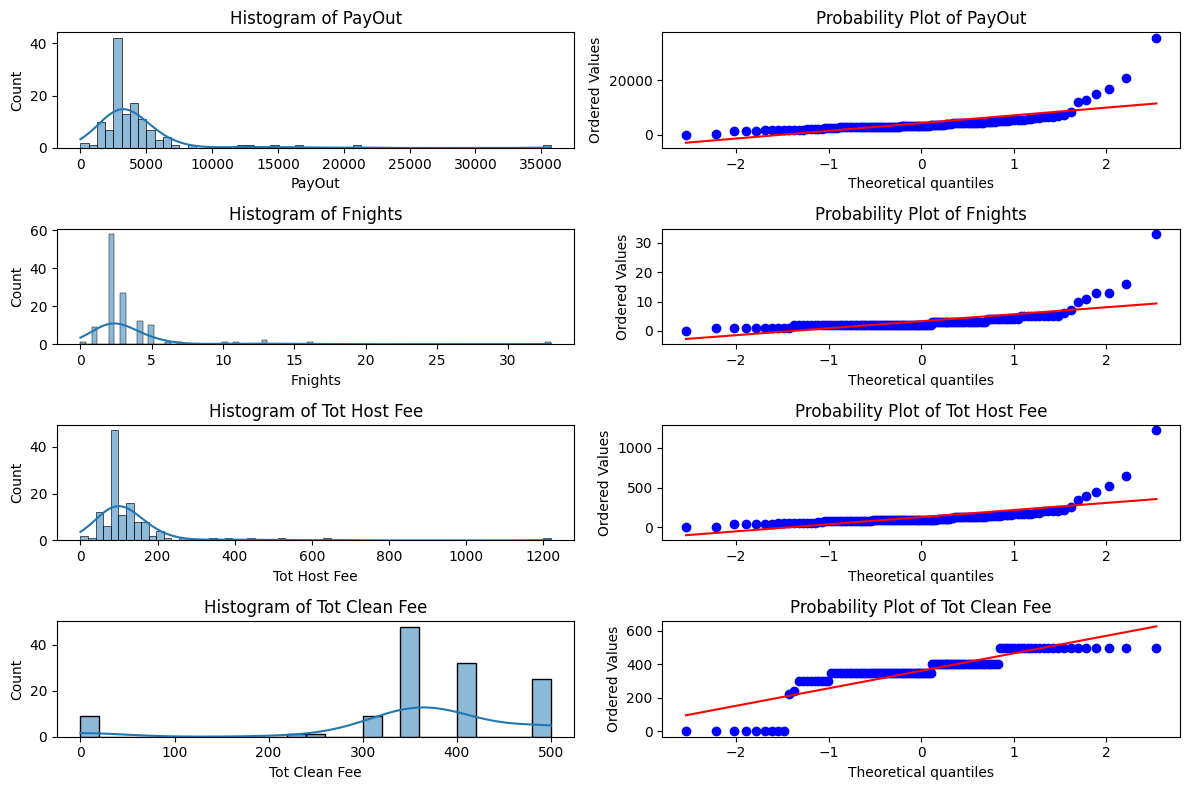

In [24]:
# Assuming 'df_numvar' is your DataFrame containing the variables you want to analyze
# Replace 'df_numvar' with your actual DataFrame containing the data
data = df_numvar

numvars = ['PayOut', 'Fnights', 'Tot Host Fee', 'Tot Clean Fee']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(numvars), 2, figsize=(12, 8))

for i, numvar in enumerate(numvars):
    # Drop NaN values and convert to numeric
    column_data = data[numvar].dropna().apply(pd.to_numeric, errors='coerce').dropna()

    # Plot histogram
    sns.histplot(column_data, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {numvar}')

    # Plot probability plot (Q-Q plot)
    stats.probplot(column_data, dist='norm', plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_markerfacecolor('red')  # Highlight the data points in red for clarity
    axes[i, 1].set_title(f'Probability Plot of {numvar}')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the combined plot
plt.show()


### Kolmogorov-Smirnov Test

To test normality, we have two options: Shapiro-Wilk Test or Kolmogorov Smirnov Test.

Shapiro-Wilk Test is good for small dataset ranging from 3 observations to 50.  In our case, we have up to 125 obs for PayOut variable. Therefore, we use Kolmogorov-Smirnov.

#### Based on p-value and significance level

In [25]:
for numvar in numvars:
    column_data = data[numvar].dropna()

    # Check if the column contains numeric data
    if pd.to_numeric(column_data, errors='coerce').notnull().all():
        column_data = column_data.astype(float)

        stat, p = stats.kstest(column_data, 'norm')
        print("Variable:", numvar)
        print("Number of rows after dropping NaNs:", column_data.shape[0])
        print("Test statistic:", stat)
        print("p-value:", p)
        # Check for normality at a significance level of 0.05
        # Can't detect right-skewness since our dataset is small.
        if p > 0.05:
            print("The data appears to be normally distributed.")
        else:
            print("The data does not appear to follow a normal distribution.")
    else:
        print("Variable:", numvar)
        print("The data in this column is not numeric and cannot be tested for normality.")

    print()  # Add a line break after each variable's test


Variable: PayOut
Number of rows after dropping NaNs: 125
Test statistic: 0.992
p-value: 1.5391408670468301e-262
The data does not appear to follow a normal distribution.

Variable: Fnights
Number of rows after dropping NaNs: 125
Test statistic: 0.8972498680518208
p-value: 6.223568162616149e-124
The data does not appear to follow a normal distribution.

Variable: Tot Host Fee
Number of rows after dropping NaNs: 125
Test statistic: 0.984
p-value: 6.54678121579301e-225
The data does not appear to follow a normal distribution.

Variable: Tot Clean Fee
Number of rows after dropping NaNs: 125
Test statistic: 0.928
p-value: 2.9370385037334226e-143
The data does not appear to follow a normal distribution.



#### Based on test statistic and critical value

In [26]:

alpha = 0.05  # Significance level (you can choose any desired significance level)

for numvar in numvars:
    column_data = data[numvar].dropna()

    # Check if the column contains numeric data
    if pd.to_numeric(column_data, errors='coerce').notnull().all():
        column_data = column_data.astype(float)

        # Perform the Kolmogorov-Smirnov test
        stat, p = stats.kstest(column_data, 'norm')

        # Compute critical value for the given significance level
        n = len(column_data)
        critical_value = stats.ksone.ppf(1 - alpha, n)

        print("Variable:", numvar)
        print("Number of rows after dropping NaNs:", column_data.shape[0])
        print("Test statistic:", stat)
        print("Critical value:", critical_value)
        print("p-value:", p)

        # Check if the test statistic is greater than the critical value
        if stat > critical_value:
            print("The data does not follow a normal distribution (significant result).")
        else:
            print("The data appears to be normally distributed (non-significant result).")
    else:
        print("Variable:", numvar)
        print("The data in this column is not numeric and cannot be tested for normality.")

    print()  # Add a line break after each variable's test


Variable: PayOut
Number of rows after dropping NaNs: 125
Test statistic: 0.992
Critical value: 0.10809379109714219
p-value: 1.5391408670468301e-262
The data does not follow a normal distribution (significant result).

Variable: Fnights
Number of rows after dropping NaNs: 125
Test statistic: 0.8972498680518208
Critical value: 0.10809379109714219
p-value: 6.223568162616149e-124
The data does not follow a normal distribution (significant result).

Variable: Tot Host Fee
Number of rows after dropping NaNs: 125
Test statistic: 0.984
Critical value: 0.10809379109714219
p-value: 6.54678121579301e-225
The data does not follow a normal distribution (significant result).

Variable: Tot Clean Fee
Number of rows after dropping NaNs: 125
Test statistic: 0.928
Critical value: 0.10809379109714219
p-value: 2.9370385037334226e-143
The data does not follow a normal distribution (significant result).



In [27]:
numvars = ['Payout', 'Fnights', 'Tot Host Fee', 'Tot Clean Fee']

for numvar in numvars:
  print(numvar)
  print()

df_numvar.info()

Payout

Fnights

Tot Host Fee

Tot Clean Fee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PayOut         125 non-null    float64
 1   Fnights        125 non-null    Int64  
 2   Tot Host Fee   125 non-null    float64
 3   Tot Clean Fee  125 non-null    float64
dtypes: Int64(1), float64(3)
memory usage: 9.1 KB


In [28]:
import scipy.stats as stats

# Assuming 'data' is your DataFrame and 'variable' is the column you want to check
data = df_numvar['PayOut'].dropna()

stat, p = stats.kstest(data, 'norm')
print("Test statistic:", stat)
print("p-value:", p)

# Check for normality at a significance level of 0.05
# Can't detect right-skewness since our dataset is small.
if p > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to follow a normal distribution.")

Test statistic: 0.992
p-value: 1.5391408670468301e-262
The data does not appear to follow a normal distribution.


### Correlation

Let's display correlation of new variables we created.  We can see that PayOut and Fnights have strong correlation (0.92), as well as Tot Host Fee with Payout (1.00). Tot Host Fee and Fnights also have strong correlation (0.92).

<Axes: >

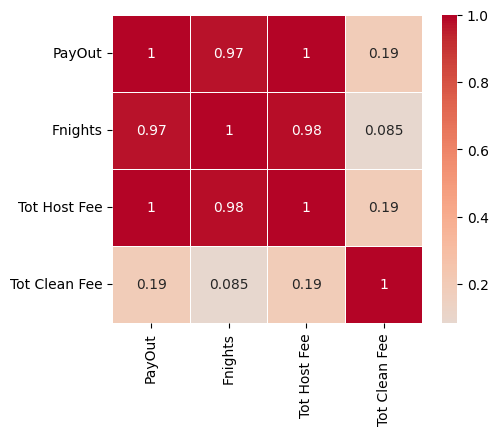

In [29]:

# Create the correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(df_numvar.corr(), center=0, annot=True, linewidth=0.5, cmap='coolwarm')

#sns.heatmap(df_numvar.corr(), center=0, annot=True, linewidth=0.5)

# Filtering Data

The goal is to get all data with Reservation 'Type' and drop 'Paid Out' column due to null values.  We will also create DataFrame for other Type categories.

### Reservation Table

In [30]:
df_rsrv = df_cmpt[df_cmpt['Type'].str.fullmatch('Reservation')].copy()
df_rsrv.drop(['Paid Out'], axis=1, inplace=True)
#df_rsrv.reset_index(drop=True, inplace=True)
df_rsrv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 275
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               128 non-null    datetime64[ns]
 1   Type               128 non-null    category      
 2   Confirmation Code  128 non-null    object        
 3   Currency           128 non-null    object        
 4   Amount             128 non-null    float64       
 5   PayOut             125 non-null    float64       
 6   Start Date         128 non-null    datetime64[ns]
 7   Nights             128 non-null    float64       
 8   Fnights            125 non-null    Int64         
 9   End Date           128 non-null    datetime64[ns]
 10  Host Fee           128 non-null    float64       
 11  Tot Host Fee       125 non-null    float64       
 12  Cleaning Fee       128 non-null    float64       
 13  Tot Clean Fee      125 non-null    float64       
 14  Per Night 

In [31]:
df_rsrv.head()

,Date,Type,Confirmation Code,Currency,Amount,PayOut,Start Date,Nights,Fnights,End Date,Host Fee,Tot Host Fee,Cleaning Fee,Tot Clean Fee,Per Night Rate
0,2019-11-15,Reservation,sqtiWKSUCD,PHP,2138.27,2138.27,2019-11-14,2.0,2,2019-11-16,66.13,66.13,350.0,350.0,894.14
2,2019-11-17,Reservation,vl5lrq4CNi,PHP,2452.16,2452.16,2019-11-16,2.0,2,2019-11-18,75.84,75.84,350.0,350.0,1051.08
4,2019-11-19,Reservation,Sgqqu2UyuH,PHP,2667.50,2667.50,2019-11-18,2.0,2,2019-11-20,82.50,82.50,350.0,350.0,1158.75
6,2019-11-21,Reservation,6QA2tFOo20,PHP,3037.65,3037.65,2019-11-20,3.0,3,2019-11-23,93.95,93.95,350.0,350.0,895.88
8,2019-11-24,Reservation,5B3XcOS3B7,PHP,3220.40,3220.40,2019-11-23,2.0,2,2019-11-25,99.60,99.60,350.0,350.0,1435.2


In [33]:
df_rsrv[df_rsrv['Confirmation Code'].str.fullmatch('6QA2tFOo20', na=False)]

,Date,Type,Confirmation Code,Currency,Amount,PayOut,Start Date,Nights,Fnights,End Date,Host Fee,Tot Host Fee,Cleaning Fee,Tot Clean Fee,Per Night Rate
6,2019-11-21,Reservation,6QA2tFOo20,PHP,3037.65,3037.65,2019-11-20,3.0,3,2019-11-23,93.95,93.95,350.0,350.0,895.88


### Other Type

#### Payout Table

This confirms that 144 rows were excluded from df_rsrv.

In [34]:
df_payout = df_cmpt[df_cmpt['Type'].str.fullmatch('Payout')].copy()
#df_payout.reset_index(drop=True, inplace=True)
df_payout.dropna(how="all", axis=1, inplace=True)
df_payout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1 to 276
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               128 non-null    datetime64[ns]
 1   Type               128 non-null    category      
 2   Confirmation Code  128 non-null    object        
 3   Currency           128 non-null    object        
 4   Paid Out           128 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 5.3+ KB


In [35]:
df_payout.head()

,Date,Type,Confirmation Code,Currency,Paid Out
1,2019-11-15,Payout,lgz4hZGA3M,PHP,2138.27
3,2019-11-17,Payout,lgz4hZGA3M,PHP,2452.16
5,2019-11-19,Payout,lgz4hZGA3M,PHP,2667.50
7,2019-11-21,Payout,lgz4hZGA3M,PHP,3037.65
9,2019-11-24,Payout,lgz4hZGA3M,PHP,3220.40


#### Resolution Payout

In [36]:
df_respay = df_cmpt[df_cmpt['Type'].str.fullmatch('Resolution Payout') ].copy()
#df_respay.reset_index(drop=True, inplace=True)
df_respay.dropna(how="all", axis=1, inplace=True)

df_respay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 11 to 230
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               16 non-null     datetime64[ns]
 1   Type               16 non-null     category      
 2   Confirmation Code  16 non-null     object        
 3   Currency           16 non-null     object        
 4   Amount             16 non-null     float64       
 5   Start Date         16 non-null     datetime64[ns]
 6   Nights             16 non-null     float64       
 7   End Date           16 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](3), float64(2), object(2)
memory usage: 1.2+ KB


In [37]:
df_respay.head(25)

,Date,Type,Confirmation Code,Currency,Amount,Start Date,Nights,End Date
11,2019-11-26,Resolution Payout,8WCuLWoDpK,PHP,500.0,2019-11-25,10.0,2019-12-05
14,2019-12-07,Resolution Payout,Zk91awnHF5,PHP,1000.0,2019-12-06,13.0,2019-12-19
19,2019-12-23,Resolution Payout,Pwfgu4y7mg,PHP,1050.0,2019-12-22,2.0,2019-12-24
28,2020-01-01,Resolution Payout,OEO0Efsbud,PHP,280.0,2019-12-31,3.0,2020-01-03
41,2020-01-20,Resolution Payout,oZGAmskjDa,PHP,500.0,2020-01-19,2.0,2020-01-21
47,2020-01-25,Resolution Payout,LhBbOl62Ck,PHP,300.0,2020-01-23,2.0,2020-01-25
50,2020-01-26,Resolution Payout,isURPZi6iK,PHP,280.0,2020-01-25,2.0,2020-01-27
55,2020-01-31,Resolution Payout,tn1d6ud7Nt,PHP,280.0,2020-01-30,3.0,2020-02-02
80,2020-03-09,Resolution Payout,iX4Cz7EI7R,PHP,280.0,2020-03-08,2.0,2020-03-10
83,2020-03-12,Resolution Payout,2eFRetWatw,PHP,300.0,2020-03-11,3.0,2020-03-14


#### Resolution Adjustment

In [38]:
df_resadj = df_cmpt[df_cmpt['Type'].str.fullmatch('Resolution Adjustment')].copy()
df_resadj.dropna(axis=1, how="all", inplace=True)
df_resadj.head(25)

,Date,Type,Confirmation Code,Currency,Amount,Start Date,Nights,End Date
101,2022-05-20,Resolution Adjustment,fwh7xS5ZdD,PHP,-3709.29,2020-03-15,33.0,2020-04-17
263,2023-01-08,Resolution Adjustment,lEhYFeFiDU,PHP,-1675.86,2023-01-05,2.0,2023-01-07


#### Adjustment

In [39]:
df_adj = df_cmpt[ df_cmpt['Type'].str.fullmatch('Adjustment')].copy()
df_adj.dropna(axis=1, how="all", inplace=True)
#df_adj.reset_index(drop=True, inplace=True)
df_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 84 to 93
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2 non-null      datetime64[ns]
 1   Type               2 non-null      category      
 2   Confirmation Code  2 non-null      object        
 3   Currency           2 non-null      object        
 4   Amount             2 non-null      float64       
 5   Start Date         2 non-null      datetime64[ns]
 6   Nights             2 non-null      float64       
 7   End Date           2 non-null      datetime64[ns]
 8   Host Fee           2 non-null      float64       
 9   Cleaning Fee       2 non-null      float64       
dtypes: category(1), datetime64[ns](3), float64(4), object(2)
memory usage: 382.0+ bytes


In [40]:
df_adj.head()

,Date,Type,Confirmation Code,Currency,Amount,Start Date,Nights,End Date,Host Fee,Cleaning Fee
84,2020-03-12,Adjustment,iX4Cz7EI7R,PHP,-1435.60,2020-03-08,2.0,2020-03-10,-44.4,-108.14
93,2020-04-13,Adjustment,noUjraV3aP,PHP,-14880.34,2020-03-15,13.0,2020-03-28,0.0,0.00


#### Misc Credit

In [43]:
df_miscr = df_cmpt[df_cmpt['Type'].str.fullmatch('Misc Credit')].copy()
df_miscr.dropna(axis=1, how="all", inplace=True)
#df_miscr.reset_index(drop=True, inplace=True)
df_miscr.head()

,Date,Type,Confirmation Code,Currency,Amount
100,2022-05-20,Misc Credit,lgz4hZGA3M,USD,12.03


In [44]:
df_miscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 100 to 100
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1 non-null      datetime64[ns]
 1   Type               1 non-null      category      
 2   Confirmation Code  1 non-null      object        
 3   Currency           1 non-null      object        
 4   Amount             1 non-null      float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 261.0+ bytes
